ct 5
   Unnamed: 0 name_x  thal_dist    thal_dir     rb_dis     rb_dir      lb_dis  \
0           0    119  24.099172  -93.699319  82.497037  86.300681   49.354712   
1           1    120  32.219433  -93.699319  85.249053  86.300681   53.998406   
2           2    121  77.511727  -86.325500  53.169100  93.674500  118.352667   
3           3    122  79.776736 -122.152295  57.572686  57.847705   98.449394   
4           4    123  44.413448   -5.108887  89.290887  -5.108887  108.601648   

       lb_dir         bfw Reach_x  ... thal_min thal_stdev          thalx  \
0  -93.699319  128.302284    UBR1  ...      NaN        NaN  421480.631371   
1  -93.699319  138.545594    UBR1  ...      NaN        NaN  421519.514647   
2  -86.325500  156.599508    UBR1  ...      NaN        NaN  421578.300964   
3 -122.152295  155.178450    UBR1  ...      NaN        NaN  421675.014181   
4  174.891113  155.342293    UBR1  ...      NaN        NaN  421833.089414   

          thaly  LB_mean  LB_max  LB_min  LB_

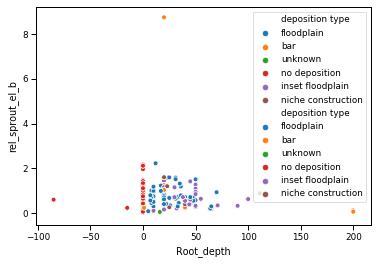

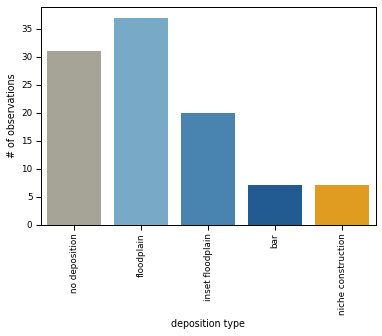

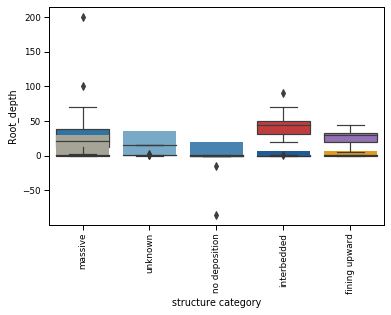

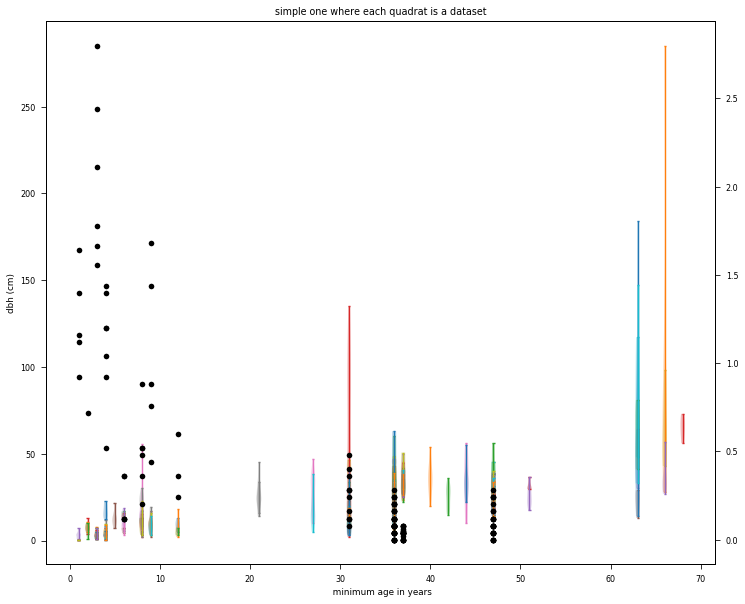

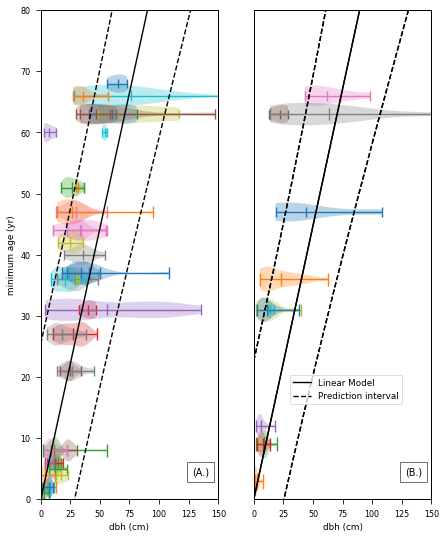

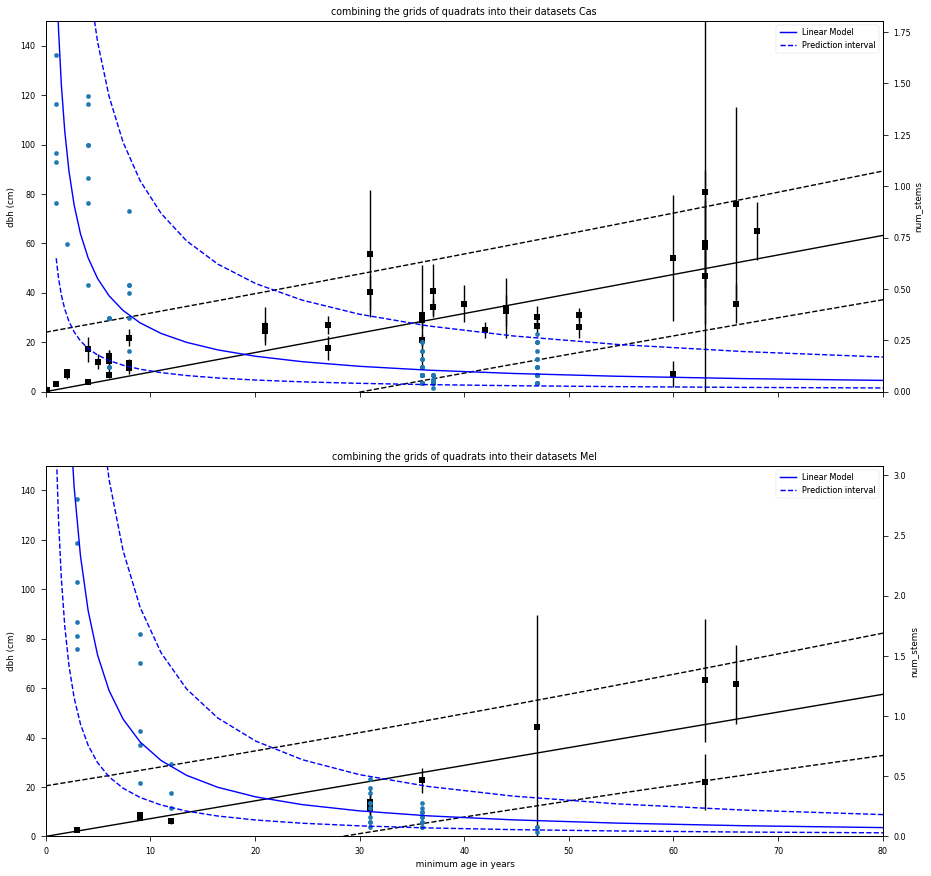

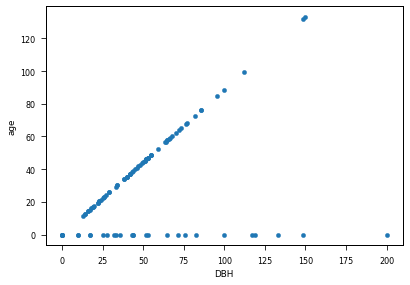

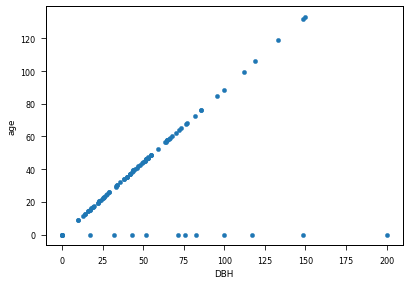

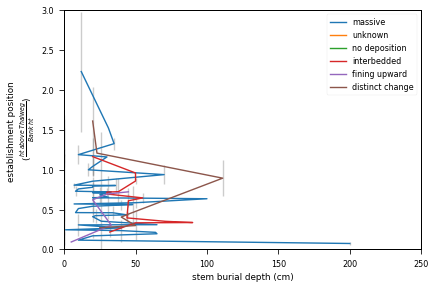

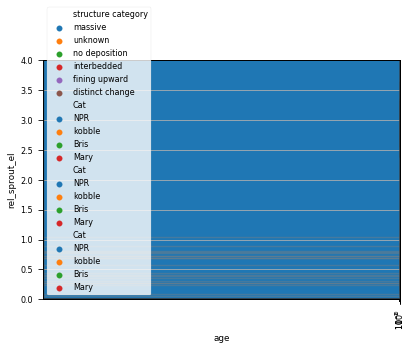

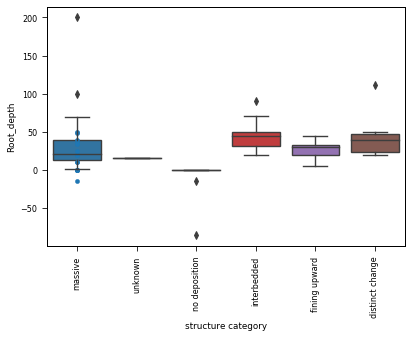

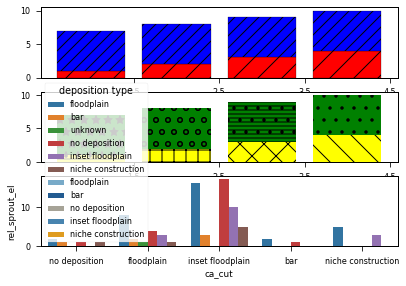

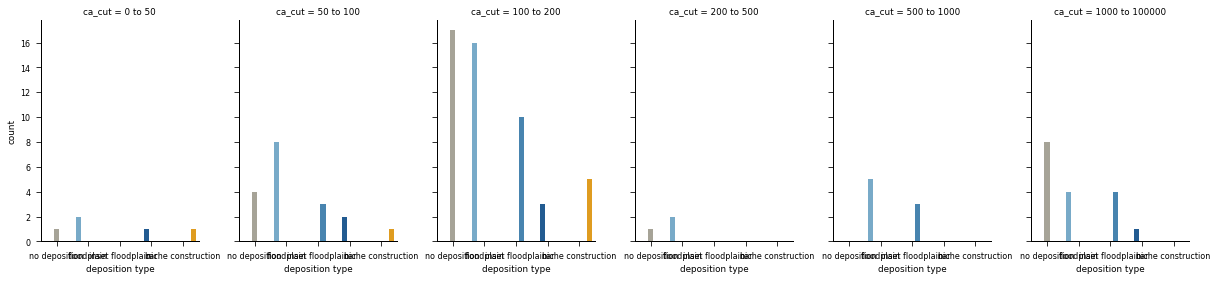

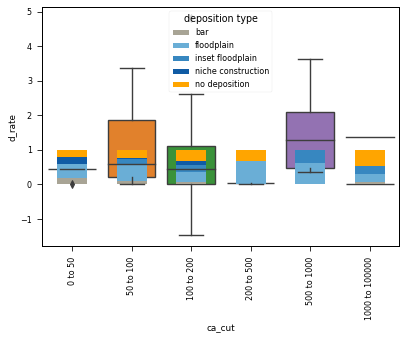

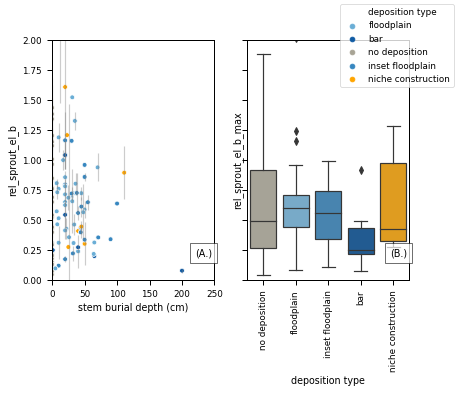

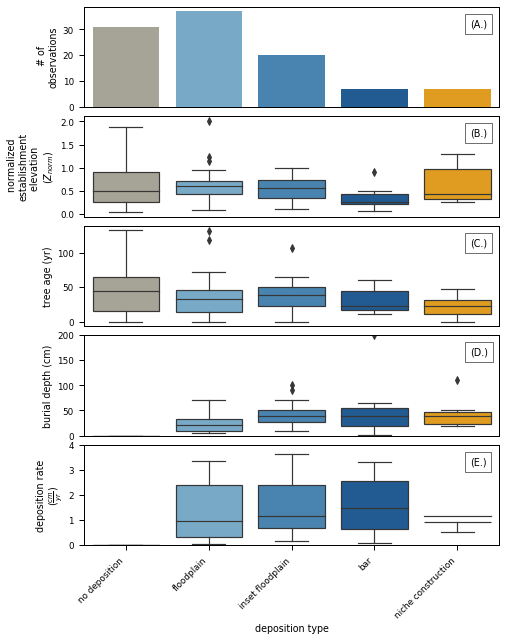

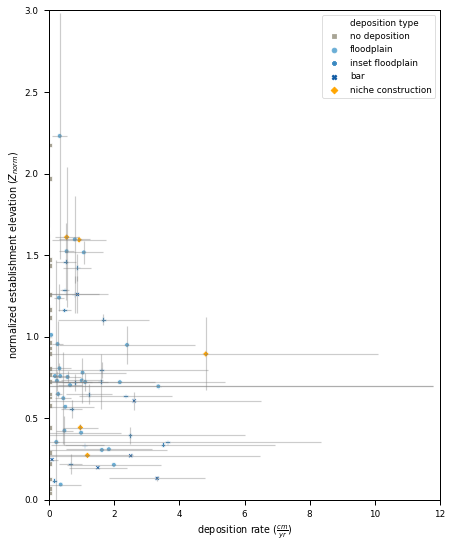

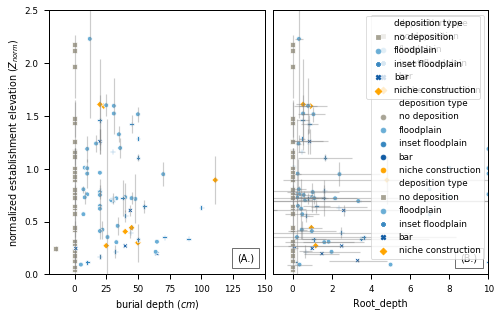

In [1]:
from combine_data_analysis import field_dat, df_comb, gis_dat_comb, df_bury, df_bury_unfiltered
import numpy as np

In [7]:
df_bury_unfiltered.columns

Index(['GPS_point', 'species', 'Photo', 'Date_time', 'Cat', 'Bank', 'Geo_Unit',
       'DBH', 'Root_depth', 'Grav_dep', 'Adv_R1', 'Adv_R2', 'Adv_R3',
       'Unnamed: 13', 'structure category', 'smallest texture',
       'biggest texture', 'texture at base', 'Strat_Desc',
       'sprout_depth_reached', 'Notes', 'inv data', 'Type of Data collected',
       'calcked circ', 'Copy-of-Buried-Tree-Form-export-meta-instanceID',
       'new_name', 'geo_unit_clean', 'species_clean', 'meas_type',
       'smallest texture clean', 'biggest texture clean',
       'texture at base clean', 'Unnamed: 0', 'name_x', 'thal_dist',
       'thal_dir', 'rb_dis', 'rb_dir', 'lb_dis', 'lb_dir', 'bfw', 'Reach_x',
       'name_y', 'Reach_y', 'type', 'sl_mean', 'sl_max', 'sl_min', 'sl_stdev',
       'slx', 'sly', 'RB_mean', 'RB_max', 'RB_min', 'RB_stdev', 'RBx', 'RBy',
       'thal_mean', 'thal_max', 'thal_min', 'thal_stdev', 'thalx', 'thaly',
       'LB_mean', 'LB_max', 'LB_min', 'LB_stdev', 'LBx', 'LBy', 'Reach'

In [2]:
df_bury_unfiltered[df_bury_unfiltered['structure category']=='distinct change'][['GPS_point', 'Date_time', 'rel_sprout_el', 'species_clean', 'Root_depth']]

,GPS_point,Date_time,rel_sprout_el,species_clean,Root_depth
19,26,20/07/18 11:12,1.593388,M. Bracteata,23.0
30,39,20/07/18 16:58,0.299191,remnant rainforest species,50.0
31,40,21/07/18 08:51,0.405788,C. Cunninghamiana,40.0
47,58,21/07/18 15:28,1.609900,C. Cunninghamiana,20.0
49,59,21/07/18 15:51,0.893549,C. Cunninghamiana,111.0
76,81,22/07/18 15:11,0.442469,C. Cunninghamiana,45.0
90,119,24/07/18 13:03,NaN,M. Bracteata,40.0
92,121,24/07/18 13:17,NaN,C. Cunninghamiana,0.0
134,153,18/11/18 13:03,0.271816,C. Cunninghamiana,25.0


In [11]:
df_bury_unfiltered[df_bury_unfiltered['rel_sprout_el_b_max'].isnull() ][['GPS_point', 'Date_time', 'structure category', 'species_clean', 'Root_depth']]

,GPS_point,Date_time,structure category,species_clean,Root_depth
90,119,24/07/18 13:03,distinct change,M. Bracteata,40.0
91,120,24/07/18 13:11,massive,C. Cunninghamiana,-50.0
92,121,24/07/18 13:17,distinct change,C. Cunninghamiana,0.0
94,123,24/07/18 13:45,interbedded,C. Cunninghamiana,105.0
121,124,24/07/18 14:19,,C. Cunninghamiana,0.0


In [4]:
df_bury_unfiltered[df_bury_unfiltered['structure category']==' ' ][['GPS_point', 'Date_time', 'structure category', 'species_clean', 'Root_depth']]

,GPS_point,Date_time,structure category,species_clean,Root_depth
81,86,22/07/18 16:32,,C. Cunninghamiana,0.0
89,106,23/07/18 12:38,,C. Cunninghamiana,0.0
103,135,24/07/18 17:15,,M. viminalis,10.0
121,124,24/07/18 14:19,,C. Cunninghamiana,0.0


In [8]:
import pandas as pd

In [15]:
df_bury['el_category'] = pd.cut(df_bury['rel_sprout_el_b_max'], bins=[0,0.25, 0.5, 0.75,1.,1.25,1.5,1.75,2])


In [29]:
df_bury['el_category'][0].left

0.0

In [39]:
df_bury['el_category_text'] =df_bury['el_category'].apply(lambda x: '{left} to {right}'.format(left =x.left,right =  x.right))
df_bury['el_category_mid'] =df_bury['el_category'].apply(lambda x: pd.to_numeric(x.mid))


In [41]:
df_bury['el_category_mid']= pd.to_numeric(df_bury['el_category_mid'])
df_bury['el_category_mid']


0      0.125
1      0.375
2      0.125
3      0.375
6      1.125
7      0.875
10     0.375
11     0.625
12     0.125
13     0.625
14     0.625
15     0.625
16     0.625
17     0.875
19     1.125
24     0.875
26     0.375
27     0.625
28     0.875
30     0.375
31     0.375
32     0.625
33     0.625
34       NaN
35     0.625
36     0.625
37     0.625
39     0.625
40     0.625
41     0.125
       ...  
108    0.625
109    1.875
110    0.125
111    0.125
112    0.375
113    0.125
114    0.625
115    0.625
117    0.125
118    0.125
119    0.125
122    0.625
125    0.625
128    0.625
129    0.375
130    0.125
132    0.125
134    0.375
135    0.375
137    0.625
139    0.375
142    0.125
147    0.375
149    0.375
150    0.375
151    0.625
152    0.375
155    1.125
156    1.125
157    0.875
Name: el_category_mid, Length: 102, dtype: float64

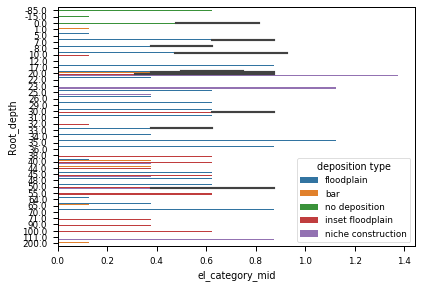

In [42]:
import seaborn as sns
sns.barplot(data=df_bury, x='el_category_mid', y='Root_depth', hue='deposition type', orient='h')

In [5]:
df_bury[df_bury['deposition type']=='niche construction'][['GPS_point', 'Date_time']]

,GPS_point,Date_time
19,26,20/07/18 11:12
30,39,20/07/18 16:58
31,40,21/07/18 08:51
47,58,21/07/18 15:28
49,59,21/07/18 15:51
76,81,22/07/18 15:11
134,153,18/11/18 13:03


In [12]:
df_merge = df_comb[df_comb.meas_type =='dbh burial'].merge(df_bury['deposition type'], left_index=True, right_index=True)

In [6]:
df_bury.shape

(102, 90)

In [34]:
df_merge[df_merge['deposition type']=='niche construction'][['GPS_point', 'Date_time','Root_depth', 'rel_sprout_el', 'rel_sprout_el_b',
       'rel_sprout_el_b_max', 'rel_sprout_el_er', 'deposition type','biggest texture clean',
       'texture at base clean',]]

,GPS_point,Date_time,Root_depth,rel_sprout_el,rel_sprout_el_b,rel_sprout_el_b_max,rel_sprout_el_er,deposition type,biggest texture clean,texture at base clean
19,26,20/07/18 11:12,23.0,1.593388,1.207627,1.127621,NaN,niche construction,med gravel,med gravel
30,39,20/07/18 16:58,50.0,0.299191,0.299191,0.297527,0.178646,niche construction,coarse sand,coarse sand
31,40,21/07/18 08:51,40.0,0.405788,0.405788,0.343734,NaN,niche construction,med gravel,med gravel
47,58,21/07/18 15:28,20.0,1.609900,1.609900,1.285539,0.429795,niche construction,med gravel,med gravel
49,59,21/07/18 15:51,111.0,0.893549,0.893549,0.821398,0.223908,niche construction,coarse sand,med gravel
134,153,18/11/18 13:03,25.0,0.271816,0.271816,0.268207,NaN,niche construction,med gravel,med gravel


In [4]:
df_comb.groupby('meas_type')['Notes'].count()

meas_type
dbh burial          116
dbh inventory        13
no meas type         11
quadrat               3
sed strat column     15
Name: Notes, dtype: int64

In [3]:
field_dat[['GPS_point', 'new_name']].head(15)

,GPS_point,new_name
0,1001,1001_NPR
1,1001,1001_NPR
2,5,5_NPR
3,5,5_NPR
4,6,6_NPR
5,8,8_NPR
6,9,9_NPR
7,10,10_NPR
8,11,11_NPR
9,12,12_NPR


In [27]:
gis_dat_comb[['name_x', 'new_name']].sort_values('name_x').head()

TypeError: '<' not supported between instances of 'str' and 'int'

In [4]:
gis_dat_comb.new_name.unique()

array(['119_Bris', '120_Bris', '121_Bris', '122_Bris', '123_Bris',
       '124_Bris', '125_Bris', '126_Bris', '127_Bris', '128_Bris',
       '129_Bris', '130_Bris', '131_Bris', '132_Bris', '133_Bris',
       '134_Bris', '135_Bris', '136_Bris', '137_Bris', '138_Bris',
       '139_Bris', '140_Bris', '141_Bris', '142_Bris', '143_Bris',
       '144_Bris', '145_Bris', '146_Bris', '147_Bris', '148_Bris',
       '149_Bris', '150_Bris', '151_Bris', '135_Mary', '136_Mary',
       '137_Mary', '138_Mary', '139_Mary', '140_Mary', '141_Mary',
       '142_Mary', '143_Mary', '144_Mary', '145_Mary', '146_Mary',
       '147_Mary', '148_Mary', '149_Mary', '150_Mary', '151_Mary',
       '152_Mary', '153_Mary', '154_Mary', '155_Mary', '165_Mary',
       '166_Mary', '167_Mary', '168_Mary', '169_Mary', '170_Mary',
       '171_Mary', '172_Mary', '173_Mary', '174_Mary', '175_Mary',
       '176_Mary', '177_Mary', '178_Mary', '179_Mary', '180_Mary',
       '181_Mary', '182_Mary', '183_Mary', '184_Mary', '185_Ma